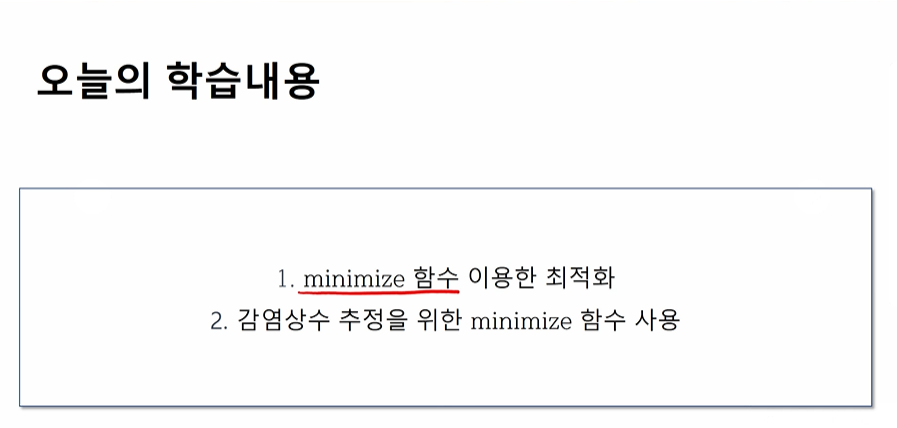

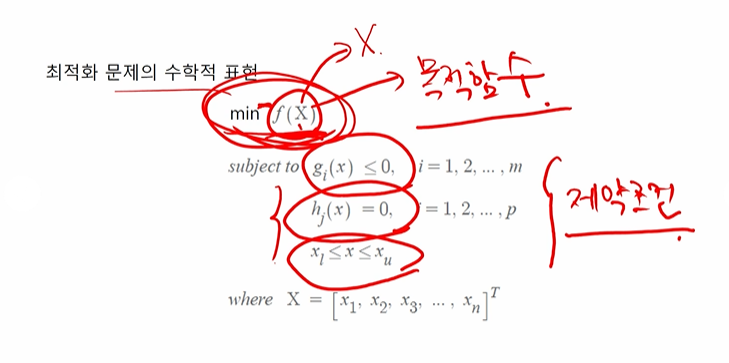

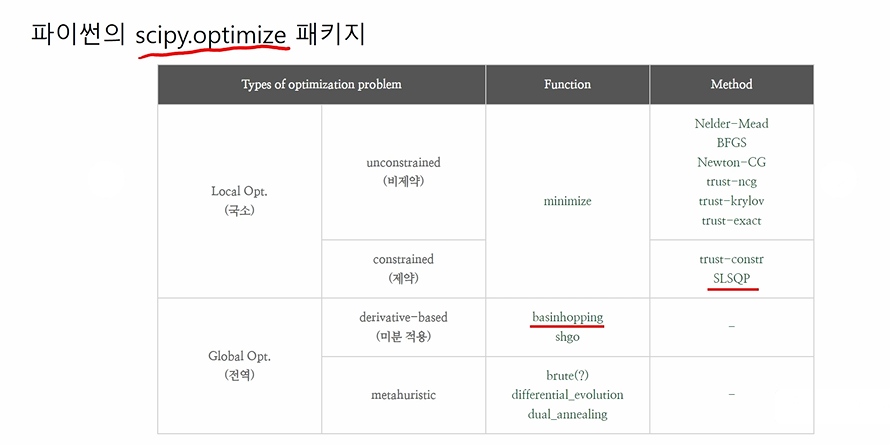

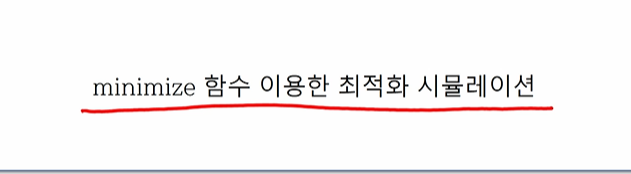

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize # 구글에 검색해보기

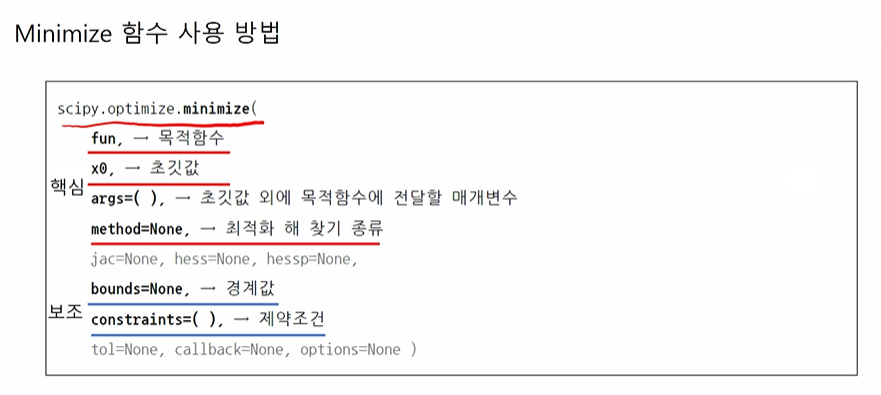

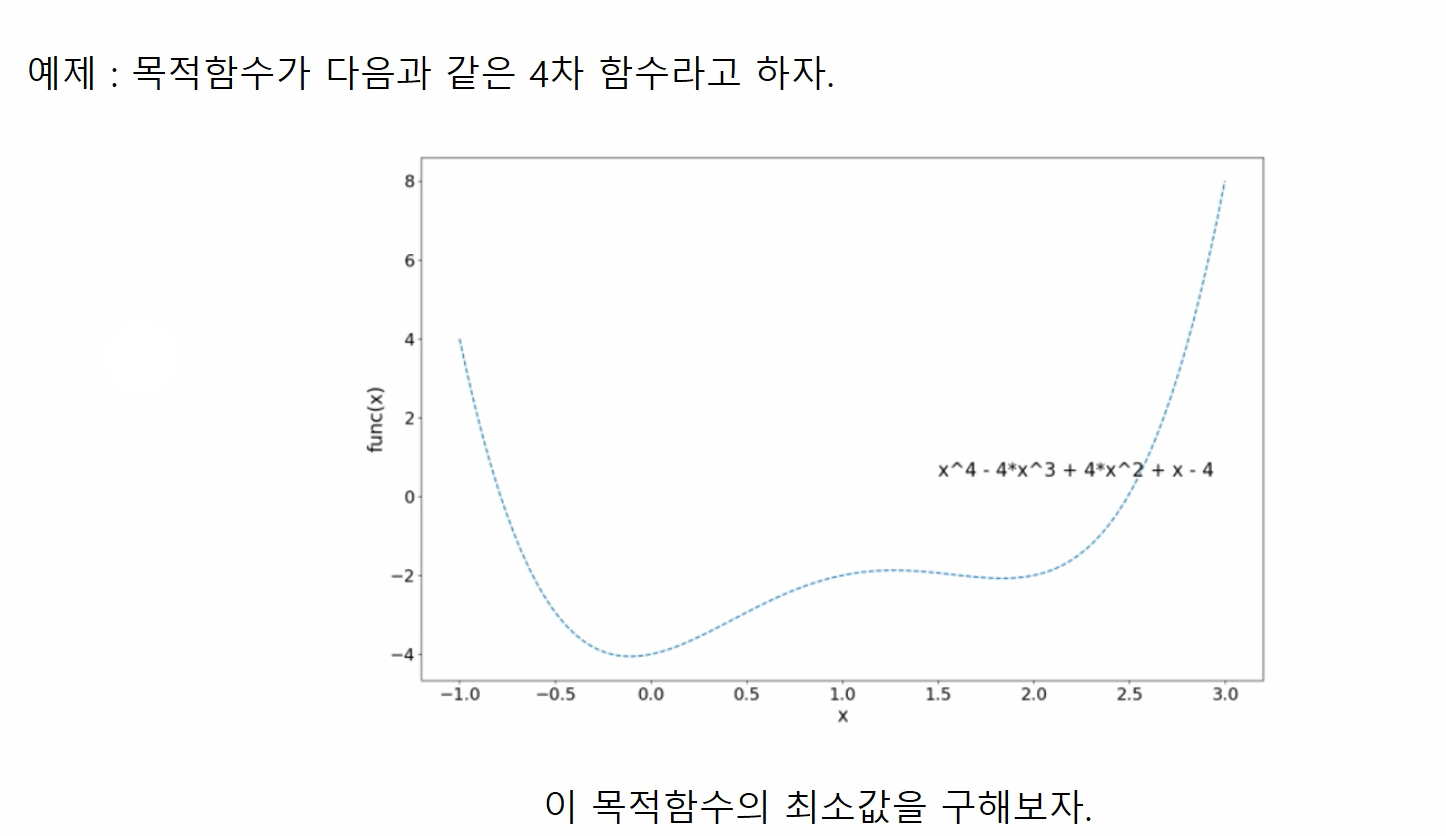

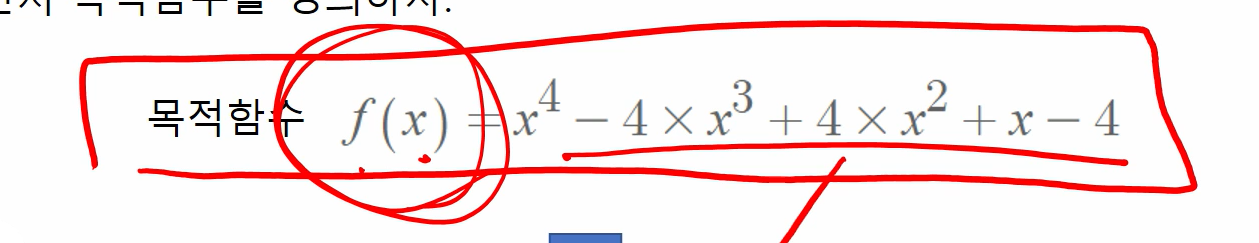

In [2]:
# 목적함수
def obj_fun(x):
    return x**4 - 4*x**3 + 4*x**2 + x - 4

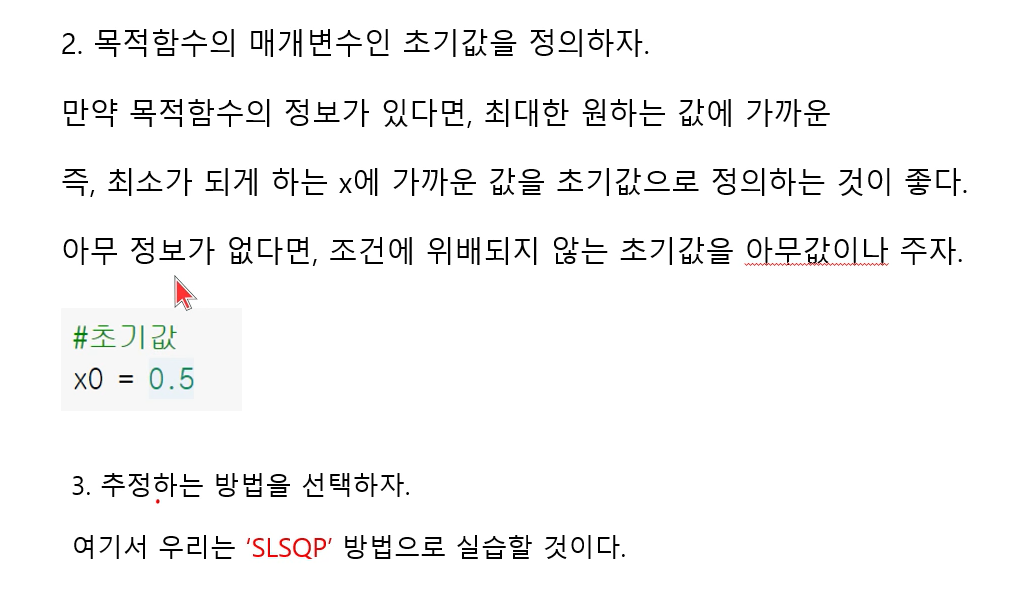

In [3]:
# 초기값
x0 = 0.5

In [4]:
sol = minimize(obj_fun, x0, method = 'SLSQP')
#              목적함수 초기값 메서드

In [5]:
sol

     fun: -4.056172844149885
     jac: array([0.00093824])
 message: 'Optimization terminated successfully'
    nfev: 14
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([-0.10707227])

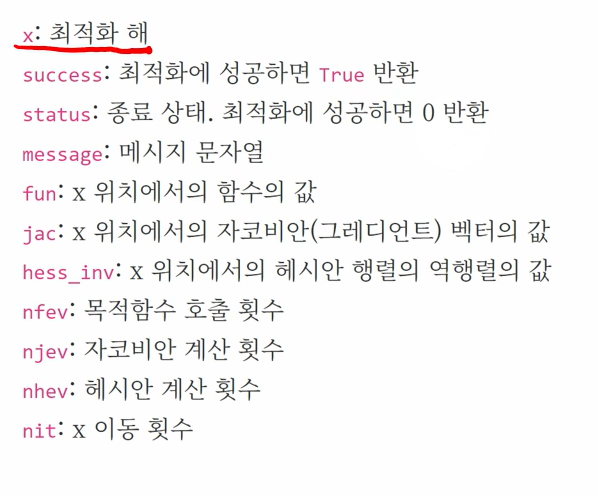

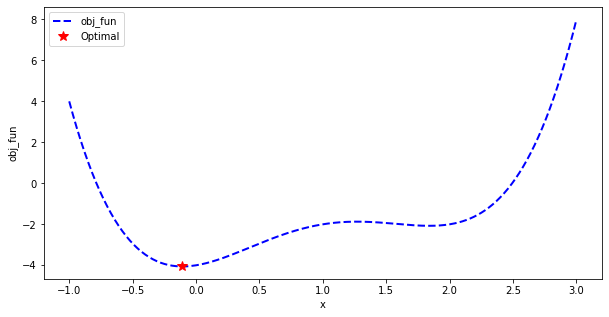

In [6]:
plt.figure(figsize = (10, 5))
x1 = np.linspace(-1, 3, 401)
x2 = sol.x
y1 = obj_fun(x1)
y2 = sol.fun
lines = plt.plot(x1, y1, '--b', x2, y2, '*r')
plt.setp(lines[0], linewidth = 2)
plt.setp(lines[1], markersize = 10)
plt.xlabel('x')
plt.ylabel('obj_fun')
plt.legend(('obj_fun', 'Optimal'), fontsize = 10, loc = 'best')
plt.show()

In [7]:
# 만약에 x에 범위가 존재한다면?
bound = (0,3)

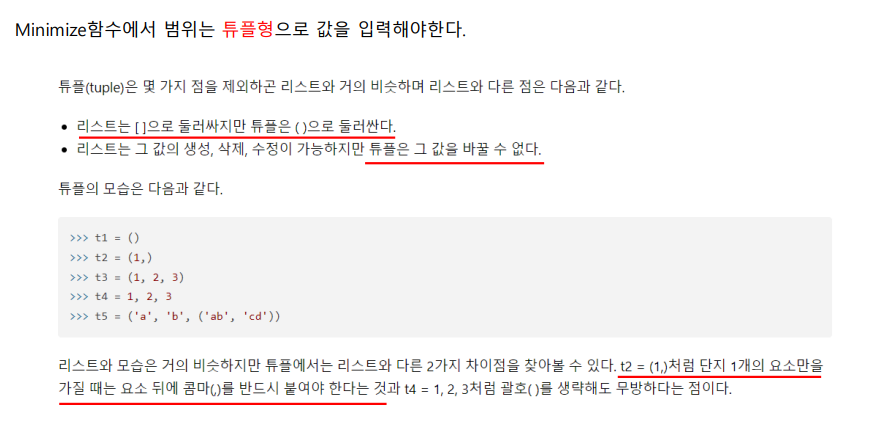

In [8]:
sol_2 = minimize(obj_fun, x0, method = 'SLSQP', bounds = (bound,))

In [9]:
sol_2

     fun: -4.0
     jac: array([1.00000006])
 message: 'Optimization terminated successfully'
    nfev: 4
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.])

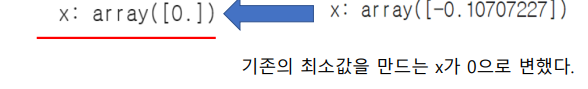

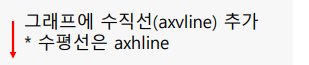

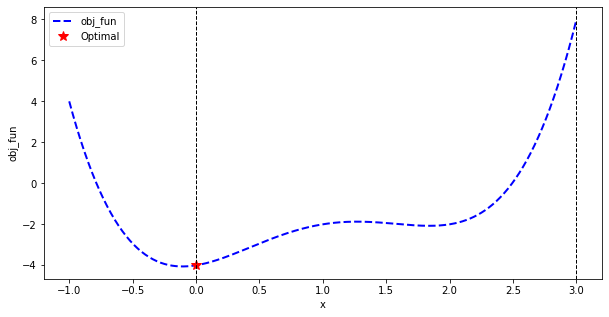

In [10]:
plt.figure(figsize = (10, 5))
x1 = np.linspace(-1, 3, 401)
x2 = sol_2.x
y1 = obj_fun(x1)
y2 = sol_2.fun
lines = plt.plot(x1, y1, '--b', x2, y2, '*r')
plt.setp(lines[0], linewidth = 2)
plt.setp(lines[1], markersize = 10)
plt.axvline(x = bound[0], color = 'k', linestyle = '--', linewidth = 1)
plt.axvline(x = bound[1], color = 'k', linestyle = '--', linewidth = 1)
plt.xlabel('x')
plt.ylabel('obj_fun')
plt.legend(('obj_fun', 'Optimal'), fontsize = 10, loc = 'best')
plt.show()

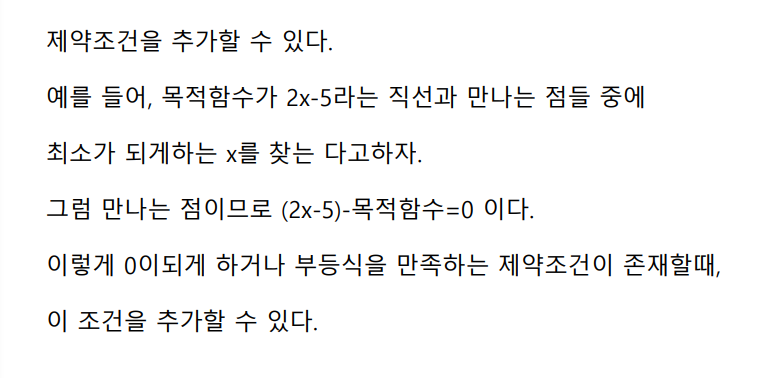

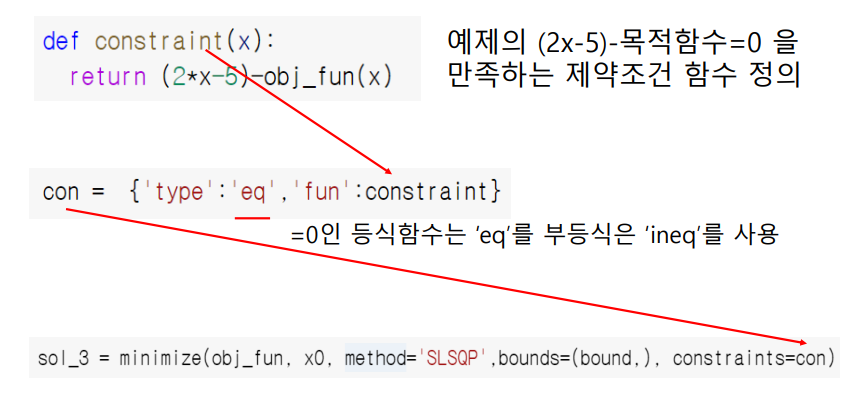

In [11]:
def constraint(x):
    return (2*x-5) - obj_fun(x)

In [12]:
con = {'type' : 'eq', 'fun' : constraint}

In [13]:
sol_3 = minimize(obj_fun, x0, method = 'SLSQP', bounds = (bound,), constraints=con)

In [14]:
sol_3

     fun: -1.9502228026876152
     jac: array([-0.52111018])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.5248886])

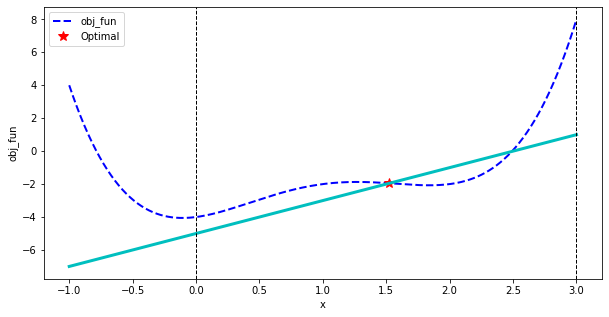

In [15]:
plt.figure(figsize = (10, 5))
x1 = np.linspace(-1, 3, 401)
x2 = sol_3.x
y1 = obj_fun(x1)
y2 = sol_3.fun
y3 = (2*x1-5)
lines = plt.plot(x1, y1, '--b', x2, y2, '*r', x1, y3, 'c')
plt.setp(lines[0], linewidth = 2)
plt.setp(lines[1], markersize = 10)
plt.setp(lines[2], linewidth = 3)
plt.axvline(x = bound[0], color = 'k', linestyle = '--', linewidth = 1)
plt.axvline(x = bound[1], color = 'k', linestyle = '--', linewidth = 1)
plt.xlabel('x')
plt.ylabel('obj_fun')
plt.legend(('obj_fun', 'Optimal'), fontsize = 10, loc = 'best')
plt.show()

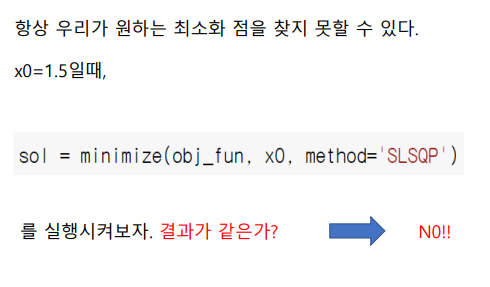

In [16]:
x0 = 1.5

In [17]:
sol = minimize(obj_fun, x0, method = 'SLSQP')
#              목적함수 초기값 메서드

In [18]:
sol

     fun: -2.073341682590727
     jac: array([0.00093734])
 message: 'Optimization terminated successfully'
    nfev: 11
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.83777745])

In [19]:
from scipy.optimize import minimize
x0 = 1.5

test_1 = minimize(obj_fun, x0, method = 'SLSQP')

In [20]:
from scipy.optimize import basinhopping
x0 = 1.5

test_2 = minimize(obj_fun, x0)

In [21]:
# 목적함수
def obj_fun(x):
    return x**4 - 4*x**3 + 4*x**2 + x - 4

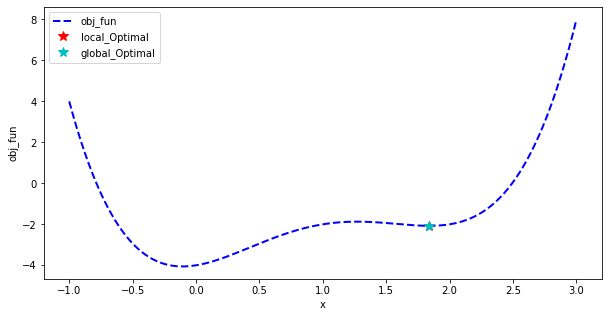

In [22]:
plt.figure(figsize = (10, 5))
x1 = np.linspace(-1, 3, 401)
x2 = test_1.x
x3 = test_2.x
y1 = obj_fun(x1)
y2 = test_1.fun
y3 = test_2.fun
lines = plt.plot(x1, y1, '--b', x2, y2, '*r', x3, y3, '*c')
plt.setp(lines[0], linewidth = 2)
plt.setp(lines[1], markersize = 10)
plt.setp(lines[2], markersize = 10)
plt.xlabel('x')
plt.ylabel('obj_fun')
plt.legend(('obj_fun', 'local_Optimal', 'global_Optimal'), fontsize = 10, loc = 'best')
plt.show()

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import basinhopping

In [24]:
# 변수들을 정의하자
# 시간
t0 = 0 # 시작시간
tf = 15 # 끝시간
n = 150 # 격자 개수 
h = (tf-t0) / n # 격자 간격
N = 51840000
alpha = 1/5 # 잠복기
gamma = 1/14 # 회복률
delta = 1/229 # 1/재감염 평균일수
time = np.linspace(t0, tf, n+1) # 시작점, 끝점, 점의 개수(간격수 + 1)의 3지 변수로 벡터를 생성할 수 있다.
#               행렬생성
#                            S        E     I    R
initial_value = np.array([51839994.0, 0.0, 6.0, 0.0])

In [25]:
def f(u, beta): 
    S, E, I, R = u # u = x[i] 
    res = np.zeros(4)
    res[0] = -beta * S * I/N + delta * R
    res[1] = beta * S * I/N - alpha * E
    res[2] = alpha * E - gamma * I
    res[3] = gamma * I - delta * R
    return res

In [26]:
def rk4(f, initial_value, t0, tf, n, beta):
    time = np.linspace(t0, tf, n+1)
    x = np.array((n+1)*[initial_value])
    h = time[1] - time[0]
    for i in range(n):
        k1 = f(x[i], beta) # f(x[0]) => f(51839994, 6, 0)
        k2 = f(x[i] + 0.5 * k1 * h, beta)
        k3 = f(x[i] + 0.5 * k2 * h, beta)
        k4 = f(x[i] + k3 * h, beta)
        x[i+1] = x[i] + h * (k1 + 2 * (k2 + k3) + k4) / 6
    return x

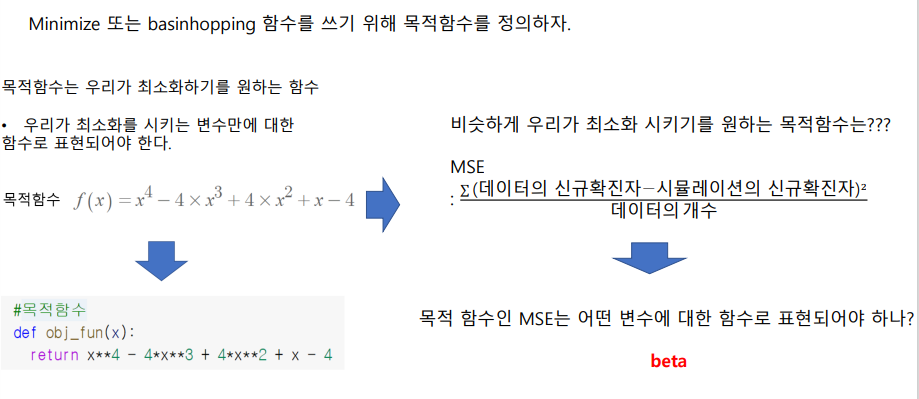

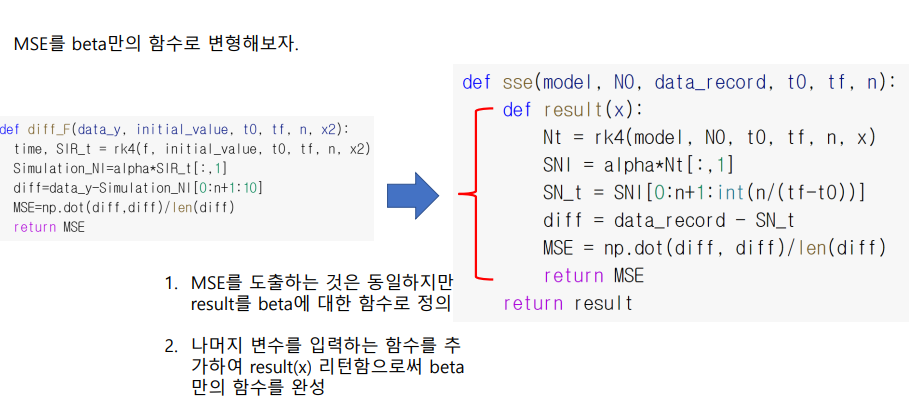

In [27]:
def sse(model, N0, data_record, t0, tf, n):
    def result(x):
        Nt = rk4(f, initial_value, t0, tf, n, x)
        SIN = alpha * Nt[:, 1]
        SN_t = SIN[0:n+1:int(n/(tf-t0))]
        diff = data_record - SN_t
        MSE = np.dot(diff, diff)/len(diff)
        return MSE
    return result

In [28]:
# pd.read_excel로 xlsx파일 불러오기
data = pd.read_excel('Cases(COVID-19)_test1.xlsx')
data

,date,cases
0,2020-08-01,6
1,2020-08-02,6
2,2020-08-03,15
3,2020-08-04,14
4,2020-08-05,22
5,2020-08-06,19
6,2020-08-07,34
7,2020-08-08,17
8,2020-08-09,17
9,2020-08-10,29


In [29]:
data_y = data.loc[0:15, 'cases']
data_y

0       6
1       6
2      15
3      14
4      22
5      19
6      34
7      17
8      17
9      29
10     45
11     55
12    142
13    272
14    178
15    202
Name: cases, dtype: int64

In [30]:
bound = (0,100)
param_init = 0.75
data_record = data.loc[0:15, 'cases']
param = minimize(sse(f, initial_value, data_y, t0, tf, n), param_init, method = "SLSQP", bounds  = (bound,))

C:\Users\gng06\AppData\Local\Temp\ipykernel_1188\3251727492.py:4: RuntimeWarning: overflow encountered in multiply
  res[0] = -beta * S * I/N + delta * R
C:\Users\gng06\AppData\Local\Temp\ipykernel_1188\3251727492.py:5: RuntimeWarning: overflow encountered in multiply
  res[1] = beta * S * I/N - alpha * E
C:\Users\gng06\AppData\Local\Temp\ipykernel_1188\2687107351.py:7: RuntimeWarning: invalid value encountered in add
  k2 = f(x[i] + 0.5 * k1 * h, beta)
C:\Users\gng06\AppData\Local\Temp\ipykernel_1188\3251727492.py:5: RuntimeWarning: invalid value encountered in subtract
  res[1] = beta * S * I/N - alpha * E
C:\Users\gng06\AppData\Local\Temp\ipykernel_1188\3251727492.py:4: RuntimeWarning: invalid value encountered in add
  res[0] = -beta * S * I/N + delta * R
C:\Users\gng06\AppData\Local\Temp\ipykernel_1188\2687107351.py:10: RuntimeWarning: invalid value encountered in add
  x[i+1] = x[i] + h * (k1 + 2 * (k2 + k3) + k4) / 6


In [31]:
param

     fun: 1711.9632401884103
     jac: array([-0.01672363])
 message: 'Optimization terminated successfully'
    nfev: 29
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.15347355])

In [32]:
param_global = basinhopping(sse(f, initial_value, data_y, t0, tf, n), param_init)

In [33]:
param_global

                        fun: 1711.9632401875804
 lowest_optimization_result:       fun: 1711.9632401875804
 hess_inv: array([[5.21207858e-06]])
      jac: array([0.00160217])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 158
      nit: 5
     njev: 73
   status: 2
  success: False
        x: array([1.15347364])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 70
                       nfev: 6073
                        nit: 100
                       njev: 2788
                    success: False
                          x: array([1.15347364])

In [35]:
N_x = rk4(f, initial_value, t0, tf, n, param.x)

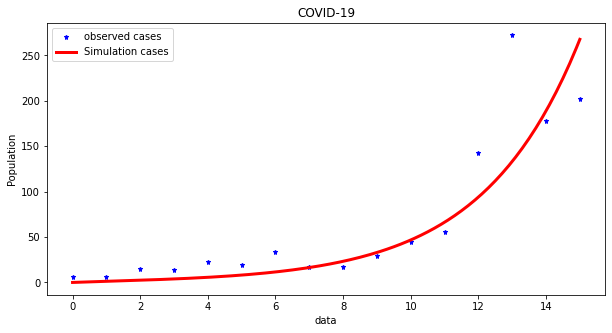

In [38]:
N_x = rk4(f, initial_value, t0, tf, n, param.x)
SIN = alpha * N_x[:, 1]
plt.figure(figsize = (10, 5))
t1 = data.index[0:16]
t2 = time
y1 = data_y
y2 = SIN
lines = plt.plot(t1, y1, '*b', t2, y2, 'r')
plt.setp(lines[0], markersize = 5)
plt.setp(lines[1], linewidth = 3)
plt.xlabel('data')
plt.ylabel('Population')
plt.legend(('observed cases', 'Simulation cases'), fontsize = 10, loc = 'best')
plt.title('COVID-19')
plt.show()